In [3]:
from matplotlib.pylab import *

In [4]:
style.use(['dark_background', 'bmh'])
rc('axes', facecolor='k')            
rc('figure', facecolor='k')          
rc('figure', figsize=(10,7))         

Text(0, 0.5, 'proximity cost profile')

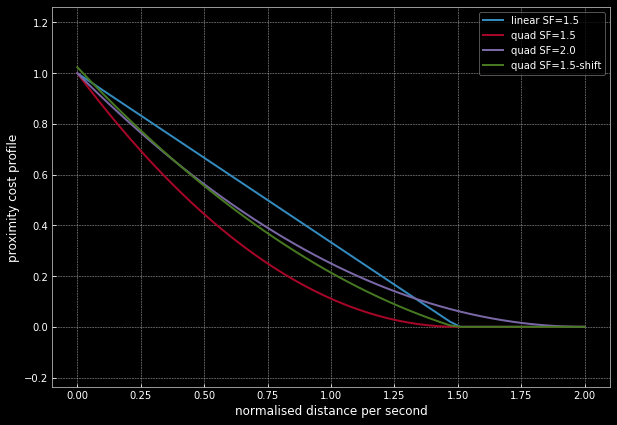

In [7]:
# Linear and quadratic proximity profile design
x = linspace(0, 2)
y = dict()
y['linear SF=1.5'] = maximum(1 - x / 1.5, 0)
y['quad SF=1.5'] = maximum((1 - x / 1.5), 0) ** 2
y['quad SF=2.0'] = (1 - x / 2.0) ** 2

# ✏️TODO: write function for analytical computation of shifts
y['quad SF=1.5-shift'] = maximum(maximum((1.06 - x / 2.0), 0) ** 2 - .1, 0)  # find correct values

for k in y: plot(x, y[k], label=k)

axis('equal')
legend()
xlabel('normalised distance per second')
ylabel('proximity cost profile')

In [12]:
def softmax(v, β=1):
    return log(sum(exp(β*v))) / β

In [14]:
import torch

Text(0, 0.5, '∂proximity_cost / ∂s')

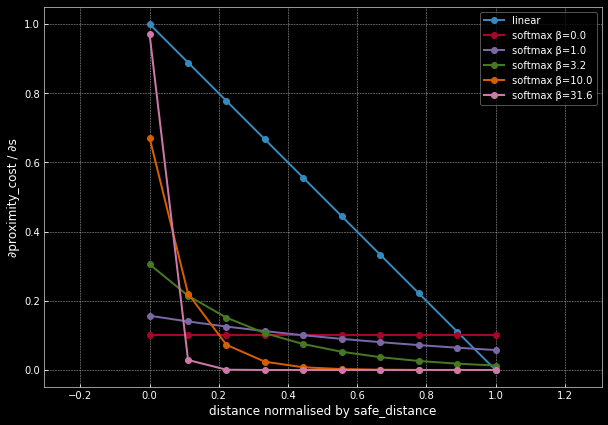

In [81]:
# Max, softmax, sum
x = torch.linspace(0, 1, 10, requires_grad=True)
y = dict()
c = 1 - x
y['linear'] = c
for e in range(-1, 4):
    β = 10 ** (e / 2)
    if e == -1: β = 0
    y[f'softmax β={β:.1f}'] = torch.softmax(β * c, dim=0)

for k in y: plot(x.detach(), y[k].detach(), '-o', label=k)

axis('equal')
legend()
xlabel('distance normalised by safe_distance')
ylabel('∂proximity_cost / ∂s')

Text(0, 0.5, '∂proximity_cost / ∂s')

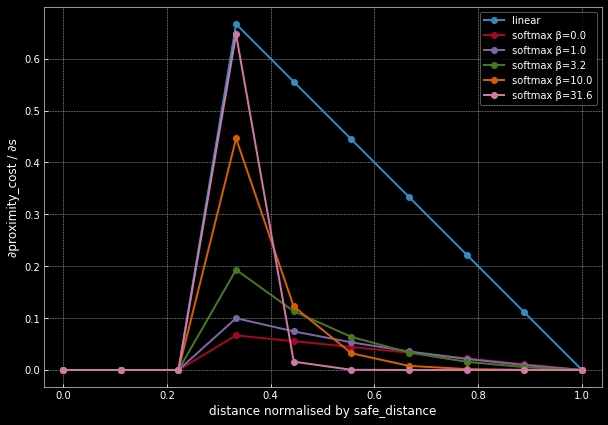

In [79]:
# Max, softmax, sum
x = torch.linspace(0, 1, 10, requires_grad=True)
y = dict()
c = 1 - x
c[:3] = 0
y['linear'] = c
for e in range(-1, 4):
    β = 10 ** (e / 2)
    if e == -1: β = 0
    y[f'softmax β={β:.1f}'] = torch.softmax(β * c, dim=0) * c

for k in y: plot(x.detach(), y[k].detach(), '-o', label=k)

axis('equal')
legend()
xlabel('distance normalised by safe_distance')
ylabel('∂proximity_cost / ∂s')

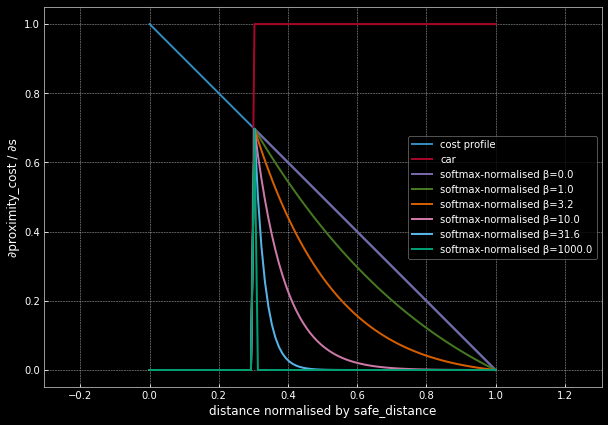

In [70]:
# Max, softmax, sum
N = 100
start = 30
x = torch.linspace(0, 1, N)
y = dict()
c = 1 - x
c[:start] = 0
y['cost profile'] = 1 - x
y['car'] = torch.zeros(N)
y['car'][start:] = 1
for e in range(-1, 5):
    β = 10 ** (e / 2)
    if e == -1: β = 0
    if e == 4: β = 1e3
    sam = torch.softmax(β * c, dim=0)
    y[f'softmax-normalised β={β:.1f}'] = sam * c / max(sam)

for k in y: plot(x, y[k], '-', label=k)

axis('equal')
legend()
xlabel('distance normalised by safe_distance')
ylabel('∂proximity_cost / ∂s')
savefig('normalised_attention.png')